# Estad√≠stica Bayesiana
<p align="center">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPl9U6Vh5_v_kFSSR0djTnmdw7Tohh_UC2LLgSFT7aMs_cfWaNw10mIvAkqQ0qRhqaOc4&usqp=CAU" alt="Imagen S2" width="400" />
</p>



**Enfoque frecuentista**:
- "El 95% de los intervalos de confianza contienen el valor verdadero"

**Enfoque bayesiano**:
- "Hay un 95% de probabilidad de que el par√°metro est√© en este intervalo"



# Teorema de Bayes

El teorema de Bayes nos permite actualizar nuestras creencias cuando obtenemos nueva informaci√≥n:

$$
\underbrace{p(\theta | Y)}_{\text{Posterior}} = \frac{\overbrace{p(Y|\theta)}^{\text{Likelihood}} \times \overbrace{p(\theta)}^{\text{Prior}}}{\underbrace{p(Y)}}
$$

donde el denominador se calcula como:

$$
p(Y) = \int p(Y|\theta) \cdot p(\theta) \, d\theta
$$

El denominador act√∫a como constante de normalizaci√≥n para que la posterior sea una distribuci√≥n de probabilidad v√°lida.

## El Problema Computacional

En muchos modelos, el producto $ p(Y|\theta) \cdot p(\theta) $ no se puede integrar de forma anal√≠tica, lo que impide obtener una expresi√≥n cerrada para la posterior o calcular esperanzas bajo ella.

Por eso muchas veces trabajamos con la versi√≥n proporcional:

$$
p(\theta | Y) \propto \mathcal{L}(Y; \theta) \cdot p(\theta)
$$

Esta forma es suficiente para aplicar m√©todos num√©ricos como el muestreo.

## M√©todos para Obtener la Posterior

1. **Priors conjugados** - Soluci√≥n anal√≠tica exacta
2. **Aproximaci√≥n cuadr√°tica** - Aproximaci√≥n local
3. **Grid sampling** - Evaluaci√≥n en grilla
4. **MCMC** - Monte Carlo via Cadenas de Markov


Los m√©todos MCMC permiten obtener muestras de la distribuci√≥n posterior $p(\theta|Y)$ sin necesidad de calcular expl√≠citamente la constante de normalizaci√≥n. A diferencia de m√©todos como **grid sampling**, que **requieren evaluar la funci√≥n en una malla completa de valores**, MCMC puede explorar regiones de alta probabilidad de forma mucho m√°s eficiente, incluso en espacios de alta dimensi√≥n. Por eso, son una herramienta fundamental en la inferencia bayesiana computacional.


## MCMC: Monte Carlo via Cadenas de Markov

### ¬øQu√© problema resuelve?

MCMC obtiene **muestras de distribuciones** que no podemos calcular directamente. Con suficientes muestras, el histograma aproxima la distribuci√≥n posterior.



**‚úì Ventajas:**
- No requiere conocer la forma exacta de la posterior, solo poder evaluarla (hasta una constante) en puntos arbitrarios
- No necesita derivadas ni optimizaci√≥n
- Funciona con modelos muy complejos (jer√°rquicos, GLMs)

**‚úó Desventajas:**
- Computacionalmente lento
- Requiere verificar convergencia de la cadena

### ¬øC√≥mo funciona?

En lugar de calcular directamente la posterior:

1. **Construimos una cadena** de valores posibles de Œ∏
2. **Aplicamos reglas** que garantizan que despu√©s de muchos pasos
3. **La historia de valores** sea equivalente a una muestra de la posterior


### Algoritmo MCMC (paso a paso)

1. **Valor inicial**: Elegir Œ∏‚ÇÄ
2. **Proponer**: Generar nuevo valor Œ∏*
3. **Evaluar**: Calcular likelihood √ó prior
4. **Decidir**: Aceptar o rechazar Œ∏*
5. **Repetir**: Miles de veces

Al final: muestra representativa de la distribuci√≥n posterior.


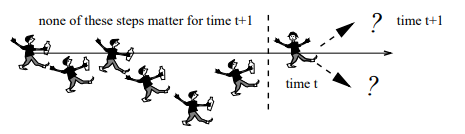

# **Introducci√≥n Pr√°ctica a PyMC**

PyMC es una librer√≠a de **programaci√≥n probabil√≠stica** en Python que facilita la inferencia bayesiana mediante algoritmos avanzados de muestreo.
<p>
    <img src="https://images.opencollective.com/pymc/1420d14/logo/256.png" alt="Logo de PyMC" width="150" />
</p>

### Algoritmos

**Hamiltonian Monte Carlo (HMC)**  
- Usa principios f√≠sicos para explorar eficientemente el espacio de par√°metros

**No-U-Turn Sampler (NUTS)**  
- Variante adaptativa de HMC que mejora la eficiencia evitando movimientos innecesarios


### ¬øPor qu√© usar PyMC?

Antes, la inferencia bayesiana se realizaba programando manualmente los algoritmos MCMC, lo cual puede ser tedioso y propenso a errores. PyMC implementa estos algoritmos y automatiza el proceso, permitiendo centrar la atenci√≥n en la construcci√≥n del modelo y el an√°lisis.

Es importante entender la idea general detr√°s de MCMC y la inferencia bayesiana, ya que PyMC es una herramienta que facilita su aplicaci√≥n pr√°ctica, pero no reemplaza el conocimiento fundamental de los m√©todos.


## **Comparaci√≥n: Muestreo con scipy vs. PyMC**

### Usando `scipy`

```python
# Generar muestras directamente
scipy_samples = stats.norm(loc=10, scale=2).rvs(10_000)  # N(10, 2¬≤)
```

Esto genera 10,000 muestras de una normal $\mathcal{N}(10, 2^2)$, y se visualiza as√≠:


* **Qu√© hace**: Genera muestras directamente de una normal usando m√©todos num√©ricos cl√°sicos.

* **Limitaci√≥n**: Solo sirve para distribuciones conocidas; no permite inferencia bayesiana con datos observados.


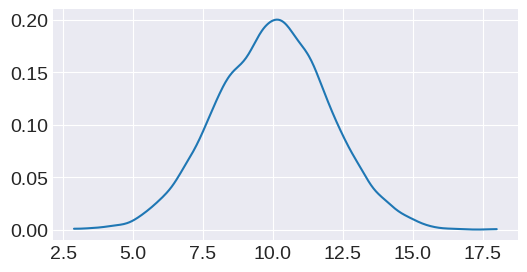

In [47]:
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt

# Generar muestras directamente
scipy_samples = stats.norm(loc=10, scale=2).rvs(10_000)  # N(10, 2¬≤)

# Visualizaci√≥n
fig, ax = plt.subplots(figsize=(6,3))
az.plot_dist(scipy_samples)
plt.show()


### Usando `PyMC` (Enfoque Probabil√≠stico)

```python
with pm.Model() as model:
    x = pm.Normal("x", mu=10, sigma=2)  # Define X ~ N(10, 2¬≤)
    pymc_samples = pm.draw(x, 10_000)   # Genera muestras
```


* **Qu√© hace:**
  * pm.Model(): Crea un contexto para definir variables aleatorias.

  * pm.Normal: Define una distribuci√≥n normal (igual que en scipy).

   * pm.draw: Genera muestras de la distribuci√≥n.

* **Ventaja**: La sintaxis es similar, pero PyMC est√° dise√±ado para modelos bayesianos complejos.

Este bloque hace lo mismo, pero **usa la abstracci√≥n de un modelo probabil√≠stico**.

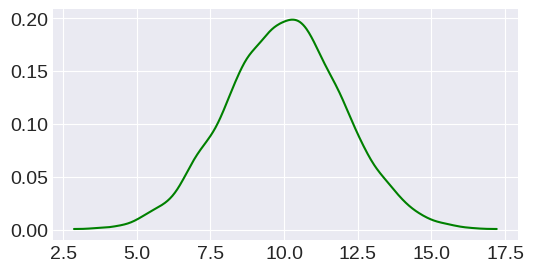

In [48]:
import pymc as pm

with pm.Model() as model:
    x = pm.Normal("x", mu=10, sigma=2)  # Define X ~ N(10, 2¬≤)
    pymc_samples = pm.draw(x, 10_000)   # Genera muestras

# Visualizaci√≥n
fig, ax = plt.subplots(figsize=(6,3))
az.plot_dist(pymc_samples, color='green')
plt.show()

# Implementaci√≥n modelo simple


## **Ejemplo 1) Beta-Bernoulli**




Ahora hacemos nuestro **primer modelo bayesiano real en PyMC**. Tenemos que:


- **Prior**:  $$\theta \sim \text{Beta}(1, 1)$$ (uniforme en [0, 1]).  
- **Likelihood**: $$Y \sim \text{Bernoulli}(\theta)$$.  
- **Datos observados**:  
  ```python
  Y = [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]  # 12 √©xitos en 20 ensayos
  ```

Queremos obtener la distribuci√≥n posterior $\theta | Y$.



In [49]:
#Datos
Y = [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]

In [50]:
import pymc as pm

#Modelo en PyMC
with pm.Model() as model:
  # Especificar el prior para Œ∏
  Œ∏ = pm.Beta("Œ∏", alpha=1, beta=1)

  # Especificar la likelihood, y condicionarla sobre los datos observados Y
  y_obs = pm.Binomial("y_obs", n=1, p=Œ∏, observed=Y)

In [51]:
# Representar el modelo
model

Muestra un gr√°fico de la estructura del modelo:
Œ∏ ‚Üí y_obs

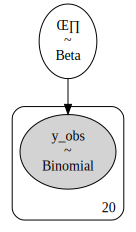

In [52]:
# Representaci√≥n gr√°fica con graphviz
pm.model_to_graphviz(model)

**Inferencia: samplear la posterior**

```
with model:
    trace = pm.sample(draws=10_000)
```


* Usa MCMC (NUTS por defecto) para muestrear de p(Œ∏‚à£Y).
* Almacena las muestras en trace (objeto de tipo InferenceData de ArviZ).

Obtiene 10,000 muestras de la distribuci√≥n **posterior de Œ∏**.

In [53]:
# Lo √∫nico que necesitamos ahora para hacer inferencia es tomar muestras de la posterior
with model:
    trace = pm.sample(draws=10_000)

Output()

In [54]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [55]:
# Lo √∫nico que necesitamos ahora para hacer inferencia es tomar muestras de la posterior
with model:
    trace = pm.sample(draws=10_000, tune= 1000, chains= 4, cores=2, return_inferencedata=True)

Output()

In [56]:
trace.posterior['Œ∏']

<xarray.DataArray 'Œ∏' (chain: 4, draw: 10000)> Size: 320kB
array([[0.43029575, 0.43029575, 0.46727345, ..., 0.63694401, 0.70677074,
        0.65796762],
       [0.73436507, 0.76557314, 0.7043919 , ..., 0.49561363, 0.53100437,
        0.6504978 ],
       [0.60355147, 0.70334509, 0.60805581, ..., 0.49281871, 0.48775619,
        0.55538675],
       [0.57032801, 0.57284523, 0.57284523, ..., 0.8177286 , 0.70350455,
        0.57385811]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 80kB 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999

In [57]:
trace.posterior['Œ∏'].shape

(4, 10000)

**üìå Argumentos de pm.sample()**


* **draws**: muestras guardadas por cadena. Para estimar la media de la posterior, pocas (500‚Äì1000) pueden alcanzar. Si quer√©s explorar colas o intervalos peque√±os, necesit√°s m√°s.

* **tune**: pasos de calentamiento para ajustar el algoritmo. Usualmente se usa el 50% de los draws.

* **chains**: cantidad de cadenas independientes. Una para debug, 3 o 4 para inferencia real.

* **cores**: cu√°ntas cadenas correr en paralelo (depende de tu procesador).

In [58]:
import arviz as az

# Visualizaci√≥n con ArviZ (funciona solo con InferenceData) --Recomendado TRUE
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
Œ∏  0.591  0.103   0.396    0.778      0.001      0.0   16681.0   27873.0   

   r_hat  
Œ∏    1.0


Esto muestra estad√≠sticas de la posterior:

* **Media posterior**: nuestro estimador puntual.
* **SD**: incertidumbre.
* **HDI 3%-97%**: intervalo de credibilidad del 94%.
* **r\_hat ‚âà 1**: indica buena convergencia (lo vemos la clase que viene junto a ess_bulk	y ess_tail)

üí° **¬øQu√© es HPDI?**

Es el intervalo de densidad posterior m√°s alta. Es decir, el intervalo m√°s compacto que contiene el 94% de probabilidad posterior.  

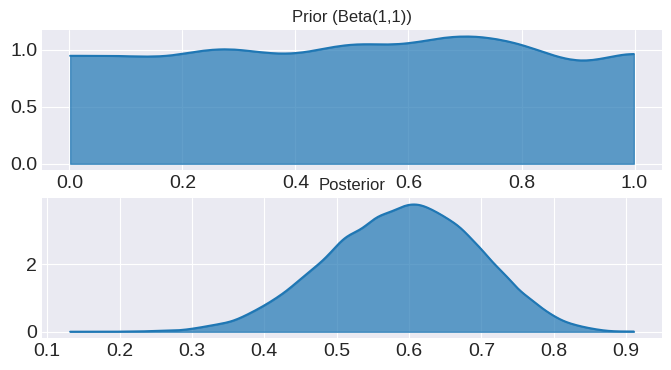

In [59]:
import matplotlib.pyplot as plt
import arviz as az

fig, axs = plt.subplots(2, 1, figsize=(8,4))

# Prior #genera esas muestras antes de observar los datos
az.plot_dist(pm.draw(Œ∏, 1000), fill_kwargs={'alpha':0.7}, ax=axs[0])  # Muestras del prior
axs[0].set_title("Prior (Beta(1,1))")

# Posterior  # trace.posterior["Œ∏"] contiene todas las muestras de Œ∏ obtenidas por PyMC.
az.plot_dist(trace.posterior["Œ∏"], fill_kwargs={'alpha':0.7}, ax=axs[1])
axs[1].set_title("Posterior")
plt.show()

<Axes: title={'center': 'Œ∏'}>

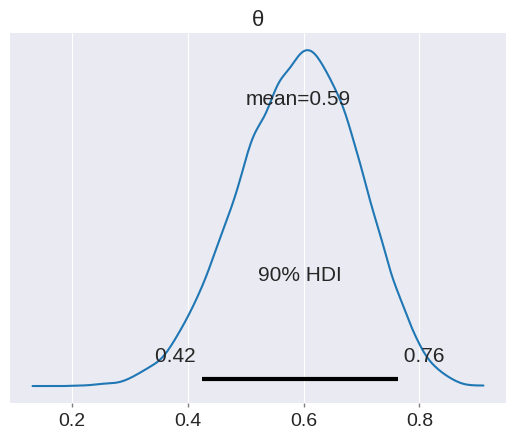

In [60]:
# az.plot_posterior(trace, var_names=["Œ∏"]) #hdi_prob=0.94
az.plot_posterior(trace, var_names=["Œ∏"], hdi_prob=0.90)

## **Ejemplo 2) Normal-Normal con varianza conocida**


Esta celda pretende ilustrar:

1. Que la estimaci√≥n bayesiana es *toda la posterior*
2. Que, sin embargo, podemos hacer una estimaci√≥n puntual (eg. MAP)
3. La diferencia entre la distribucion $y|\theta$ y la posterior predictiva


Para eso supongamos que tenemos el siguiente modelo (tanto la prior como la likelihood son normales):

$$
\theta \sim \mathcal{N}(\mu_{\theta}, \sigma^2=10^2)
$$
$$
X |\theta \sim \mathcal{N}(\mu=\theta, \sigma^2=1)
$$

Y los datos provienen de una distribuci√≥n normal con $\mu=5$ y $\sigma^2=2^2$

In [61]:
from scipy import stats
import pymc as pm
import numpy as np

#datos
X = stats.norm.rvs(loc=10, scale = 2,size = 30)

#modelo bayesiano
with pm.Model() as normal_model:
  #prior
  Œ∏ = pm.Normal('Œ∏', 0, 10)

  # verosimilitud
  X_obs = pm.Normal('X_obs', Œ∏, 1, observed=X)

In [62]:
with normal_model:
    # Obtener la estimaci√≥n puntual (MAP)
    map_estimate = pm.find_MAP()

    # Samplear de la posterior
    idata = pm.sample(1000, return_inferencedata=True)
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Output()

Output()

Output()

In [63]:
idata.posterior['Œ∏']
#idata

<xarray.DataArray 'Œ∏' (chain: 2, draw: 1000)> Size: 16kB
array([[ 9.82075879, 10.07039761,  9.9239945 , ...,  9.68304581,
         9.65997057,  9.65997057],
       [ 9.38591938,  9.97941718,  9.71828187, ...,  9.68554037,
         9.61589223,  9.73635892]])
Coordinates:
  * chain    (chain) int64 16B 0 1
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

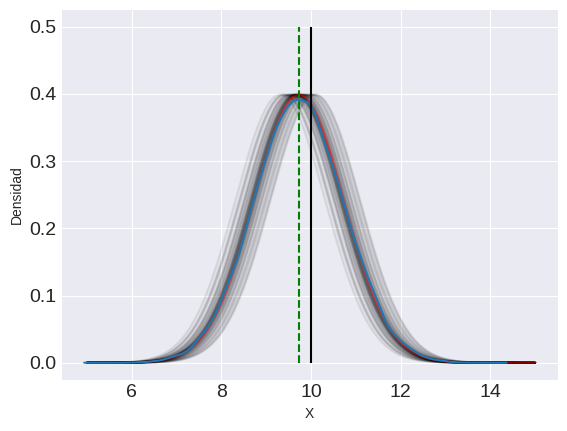

In [64]:
thetas_posterior = idata.posterior['Œ∏'].values.flatten()
x_axis = np.linspace(5, 15, 10000)

fig, ax = plt.subplots()
# Graficar X|theta ~ N (theta, scale=1)
for theta in thetas_posterior[:100]:
    ax.plot(x_axis, stats.norm.pdf(x_axis, loc=theta, scale=1), color='k', alpha=0.05)

# Graficar X|theta para la MAP
ax.plot(x_axis, stats.norm.pdf(x_axis, loc=map_estimate['Œ∏'], scale=1), color='red', alpha=0.5)

# Graficar la posterior predictive
az.plot_dist(idata.posterior_predictive['X_obs'].values, ax=ax)

ax.vlines(10, 0, .5, colors = 'black') # True mean
ax.vlines(map_estimate['Œ∏'], 0, .5, linestyles='dashed', colors = 'green') # MAP estimate

ax.set_xlabel("X")
ax.set_ylabel("Densidad")

plt.show()

# Ejercicio 1 - Practico 8 MCMC

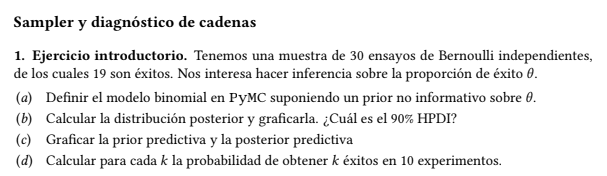

üì¶ Librer√≠as necesarias

In [65]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Configuramos el estilo de las gr√°ficas
plt.style.use('seaborn-v0_8-darkgrid')

## üßÆ (a) Definimos el modelo binomial en PyMC

In [66]:
# Datos
exitos = 19
ensayos = 30

In [67]:
#defininamos el modelo bayesiano
with pm.Model() as binomodel:
    # Prior no informativo: Œ∏ ~ Uniform(0, 1)
    theta = pm.Uniform('theta', lower=0, upper=1)

    # Verosimilitud: y ~ Binomial(n=30, p=Œ∏)
    y = pm.Binomial("y", n=ensayos, p=theta, observed=exitos)

    #muestreo posterior
    trace = pm.sample(draws= 1000, chains= 3)

Output()

In [68]:
binomodel

In [69]:
# with binomodel:
#   idata = pm.sample(
#     draws=1000,      # 1000 muestras posteriores por cadena
#     tune=1000,       # 1000 iteraciones de "burn-in" (ajuste)
#     chains=2,        # 2 cadenas MCMC independientes
#     cores=2,         # Usa 2 n√∫cleos de CPU (1 cadena por n√∫cleo)
#     return_inferencedata=True # Devuelve un objeto InferenceData (recomendado)
# )


| L√≠nea                     | Qu√© hace                                                                                                     |
| ------------------------- | ------------------------------------------------------------------------------------------------------------ |
| `theta = pm.Uniform(...)` | Define el prior: \$\theta \sim \text{Uniforme}(0,1)\$. No informativo.                                       |
| `y = pm.Binomial(...)`    | Define la verosimilitud: se observaron `exitos` en `ensayos` intentos, con probabilidad de √©xito \$\theta\$. |
| `pm.sample(...)`          | Realiza el muestreo MCMC con NUTS.                                                                           |
| `draws=1000`              | 1000 muestras por cadena despu√©s del tuneo.                                                                  |
| `tune=500`                | 500 pasos para calibrar el muestreador (se descartan).                                                       |
| `chains=4`                | Cuatro cadenas independientes (√∫til para diagnosticar convergencia).                                         |
| `cores=2`                 | Corre dos cadenas a la vez, aprovechando varios n√∫cleos de tu compu.                                         |


In [70]:
# Imprimimos el modelo para ver su estructura
print("Estructura del modelo:")
binomodel

Estructura del modelo:


## üìà (b) Graficar la posterior y calcular el 90% HPDI

**Visualizamos la distribuci√≥n posterior**

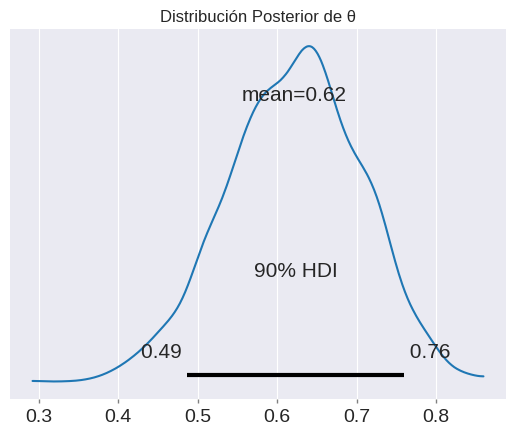

In [71]:
az.plot_posterior(trace, var_names=["theta"], hdi_prob=0.9)
plt.title("Distribuci√≥n Posterior de Œ∏")
plt.show()

In [72]:
19/30

0.6333333333333333

In [73]:
az.summary(trace,hdi_prob=0.9)

mean     sd  hdi_5%  hdi_95%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.621  0.084   0.487     0.76      0.002    0.001    1381.0    2017.0   

       r_hat  
theta    1.0

## üîÆ (c) Distribuciones predictivas

In [74]:
#defininamos el modelo bayesiano
with pm.Model() as binomodel:
    # Prior no informativo: Œ∏ ~ Uniform(0, 1)
    theta = pm.Uniform('theta', lower=0, upper=1)

    # Verosimilitud: y ~ Binomial(n=30, p=Œ∏)
    y = pm.Binomial("y", n=ensayos, p=theta, observed=exitos)

    #muestreo posterior
    trace = pm.sample(draws= 1000, chains= 3)

Output()

In [75]:
with binomodel:
  prior_pred = pm.sample_prior_predictive(samples=1000)
  #posterior en trace
  posterior_pred = pm.sample_posterior_predictive(trace)

Output()

In [76]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [77]:
trace.extend(prior_pred)
trace.extend(posterior_pred)

In [78]:
trace

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [79]:
trace.posterior_predictive['y']

<xarray.DataArray 'y' (chain: 3, draw: 1000)> Size: 24kB
array([[17, 16, 20, ..., 16, 16, 22],
       [22, 22, 19, ..., 16, 14, 19],
       [21, 11, 18, ..., 15, 21, 18]])
Coordinates:
  * chain    (chain) int64 24B 0 1 2
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

<Axes: title={'center': 'theta'}>

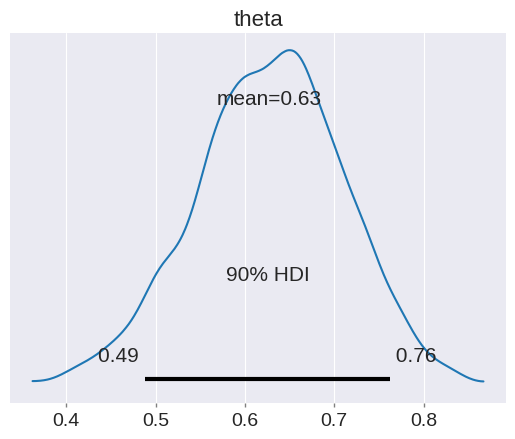

In [80]:
#grafico posterior
az.plot_posterior(trace, var_names=['theta'], hdi_prob=0.90)

In [81]:
trace

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [82]:
trace.extend(prior_pred)
trace.extend(posterior_pred)

In [83]:
trace

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

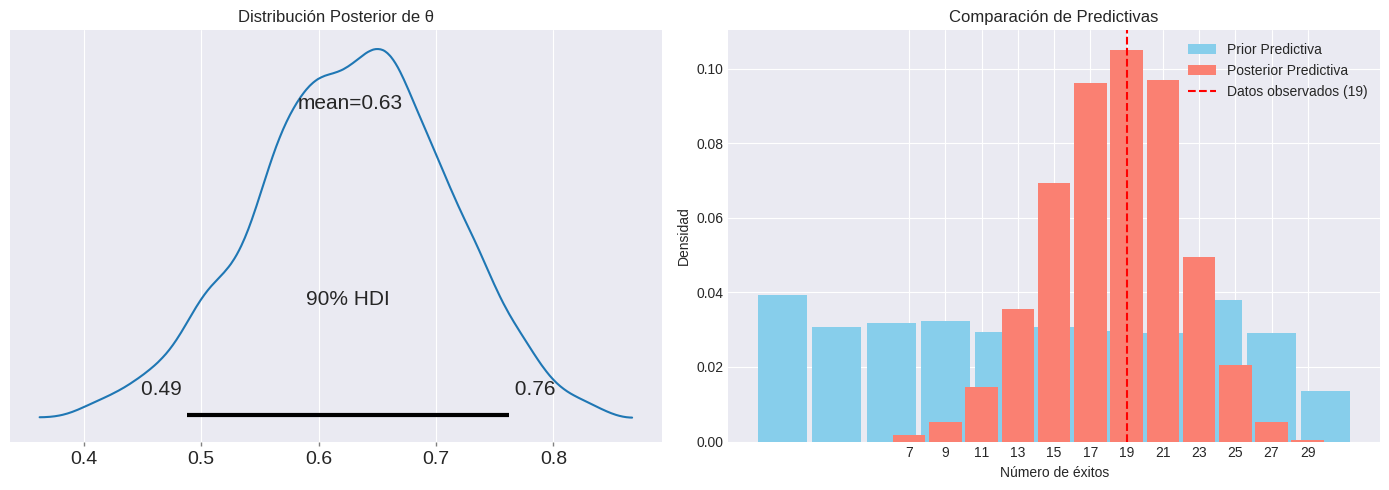

In [84]:
# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico posterior
az.plot_posterior(trace, var_names=['theta'], hdi_prob=0.90, ax=ax1)
ax1.set_title('Distribuci√≥n Posterior de Œ∏')

# Gr√°fico predictivas
az.plot_dist(trace.prior_predictive['y'].values.flatten(),
            label='Prior Predictiva', color='skyblue', ax=ax2)
az.plot_dist(trace.posterior_predictive['y'].values.flatten(),
            label='Posterior Predictiva', color='salmon', ax=ax2)
ax2.axvline(exitos, color='red', linestyle='--', label='Datos observados (19)')
ax2.set_title('Comparaci√≥n de Predictivas')
ax2.legend()
ax2.set_xlabel('N√∫mero de √©xitos')
ax2.set_ylabel('Densidad')

plt.tight_layout()
plt.show()

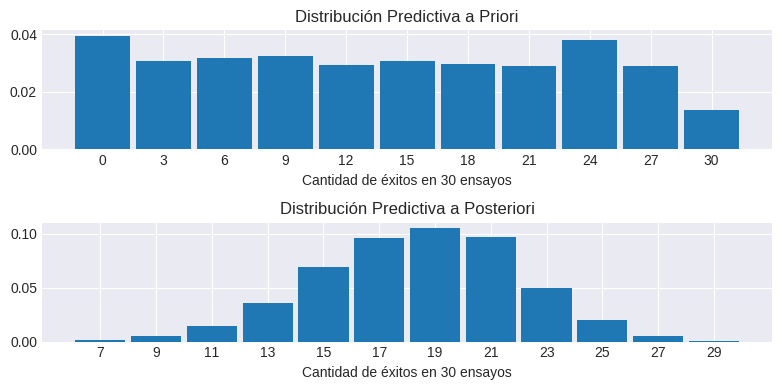

In [85]:
# Graficar n√∫mero de √©xitos en ensayos nuevos (p=Œ∏)
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

# Prior predictive
az.plot_dist(trace.prior_predictive["y"], ax=axs[0])
axs[0].set_title("Distribuci√≥n Predictiva a Priori")
axs[0].set_xlabel("Cantidad de √©xitos en 30 ensayos")

# Posterior predictive
az.plot_dist(trace.posterior_predictive["y"], ax=axs[1])
axs[1].set_title("Distribuci√≥n Predictiva a Posteriori")
axs[1].set_xlabel("Cantidad de √©xitos en 30 ensayos")

plt.tight_layout()
plt.show()

## üéØ (d) Probabilidad de obtener k √©xitos en 10 nuevos experimentos

In [86]:
# Extraer muestras de Œ∏ desde la posterior
theta_samples = trace.posterior["theta"].values.flatten()

In [87]:
# Para cada k = 0,...,10 calcular la probabilidad promedio
k_vals = np.arange(11)
probs = [np.mean(binom.pmf(k, n=10, p=theta_samples)) for k in k_vals]

In [88]:
probs

[np.float64(0.00028735641805515387),
 np.float64(0.0028252847761890388),
 np.float64(0.013614931572175241),
 np.float64(0.042611873759637146),
 np.float64(0.09630673041711837),
 np.float64(0.16461562324937656),
 np.float64(0.21586899902732185),
 np.float64(0.21490041233562474),
 np.float64(0.15595430194537627),
 np.float64(0.07486161721653475),
 np.float64(0.018152869282590682)]

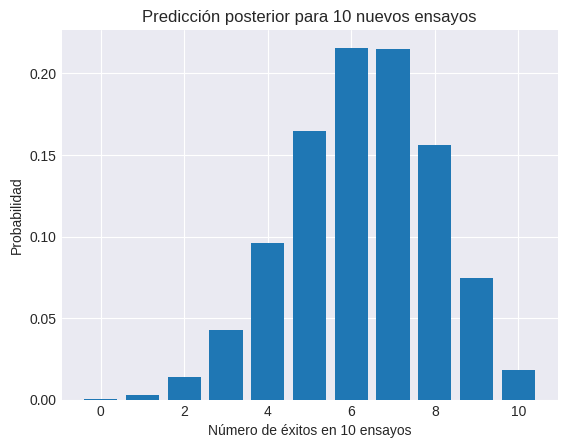

In [89]:
# Graficar
plt.bar(k_vals, probs)
plt.xlabel("N√∫mero de √©xitos en 10 ensayos")
plt.ylabel("Probabilidad")
plt.title("Predicci√≥n posterior para 10 nuevos ensayos")
plt.show()